<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Base Python: Comma Separated Value (CSV) Files
              
</p>
</div>

Data Science Cohort Live NYC Sept 2022
<p>Phase 1: Topic 3</p>
<br>
<br>

<div align = "right">
<img src="images/flatiron-school-logo.png" align = "right" width="200"/>
</div>


# Data Analysis with CSVs

In this lesson, we'll complete a full data analysis with a raw data file. Comma Separated Values files, known as CSVs, are one of the most common file formats for storing tabular data. In this lesson, we'll show you how to load one into memory and work with it using Python.

# Objectives

Perform a complete data analysis by...

- Creating a Python data structure from a .csv file
- Exploring and cleaning the data 
- Conducting descriptive analysis
- Visualizing the results

#### Comma Separated Value Format

- Tabular data
- Column entries separated by commas
- Typical file extensions: .csv, .dat, .txt
- Very common data format

Example: Track times (s) for 100m dash for four athletes across 3 meets.

# Loading a CSV

The before you can work with a CSV file, you need to load it into memory.

## Get the File Path

Make sure you have the path to your data file. For this example, it is in the root folder of this repository.

In [1]:
# This will only work on Mac, Linux, or a separate bash terminal in Windows

!ls

data                          images
data_analysis_with_csvs.ipynb


We use `.` to indicate the root folder of the repository when working within this notebook.

In [2]:
csv_file_path = "./data/King_County_Real_Estate_Sales.csv"

## Inspecting CSV files

In a CSV file, each line represents one row of tabular data, and consecutive values in that row are separated by a comma. Often, the first row contains the column names separated by commas, also known as field names. Let's confirm that this is the case and learn about our dataset by printing the first two lines of the file.

### Printing Lines in Python

We use the `with open()` syntax to easily open and read the file in the notebook. Using this syntax will automatically close the file once the statement is done running.

In [3]:
# This code prints the first line of the CSV file

with open(csv_file_path) as csvfile:
    print(csvfile.readline())

ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning



Next, we can print the second line to look at an example of one observation from our dataset. This represents one real estate sale in Kings County.

In [4]:
# This code prints the second line of the CSV file

with open(csv_file_path) as csvfile:
    csvfile.readline()
    print(csvfile.readline())

2687551,138860,110,08/21/2014,245000,20140828001436,   ,   ,      , ,              ,       ,WENKLE NOEL SMITH -TRUSTEE                        ,ALEXANDER APRIL                                   ,3,6,3,N,N,N,N,1,8, 



### Printing Lines in bash

Alternatively, you could use a bash command to print the first two lines.

In [5]:
# This will only work on Mac, Linux, or a separate bash terminal in Windows

!head -n 2 ./data/King_County_Real_Estate_Sales.csv

ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
2687551,138860,110,08/21/2014,245000,20140828001436,   ,   ,      , ,              ,       ,WENKLE NOEL SMITH -TRUSTEE                        ,ALEXANDER APRIL                                   ,3,6,3,N,N,N,N,1,8, 


### Discussion
Based on these two lines, what can we infer about the contents of the data file? What questions arise for you about the data?

## Using the `csv` module

The [`csv` module](https://docs.python.org/3/library/csv.html) lets us easily process data in CSV files. We will use it to read each row in the `.csv` file and store its information in a Python object we can use for further analysis. 

In [6]:
import csv

The [`csv.DictReader`](https://docs.python.org/3/library/csv.html#csv.DictReader) object is a file reader, reading each row and then converting it to a dictionary. By default, it turns each row into a dictionary, using the field names from the first row as the keys.

In [7]:
# Print OrderedDict from first row of CSV file 

with open(csv_file_path) as csvfile:
    reader = csv.DictReader(csvfile)
    print(next(reader))

{'ExciseTaxNbr': '2687551', 'Major': '138860', 'Minor': '110', 'DocumentDate': '08/21/2014', 'SalePrice': '245000', 'RecordingNbr': '20140828001436', 'Volume': '   ', 'Page': '   ', 'PlatNbr': '      ', 'PlatType': ' ', 'PlatLot': '              ', 'PlatBlock': '       ', 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ', 'BuyerName': 'ALEXANDER APRIL                                   ', 'PropertyType': '3', 'PrincipalUse': '6', 'SaleInstrument': '3', 'AFForestLand': 'N', 'AFCurrentUseLand': 'N', 'AFNonProfitUse': 'N', 'AFHistoricProperty': 'N', 'SaleReason': '1', 'PropertyClass': '8', 'SaleWarning': ' '}


Let's get all of the data out of our file and into dictionaries, and store those dictionaries in a new list called `sales`.

In [8]:
sales = []

with open(csv_file_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sales.append(row)

In [9]:
sales[0:3]

[{'ExciseTaxNbr': '2687551',
  'Major': '138860',
  'Minor': '110',
  'DocumentDate': '08/21/2014',
  'SalePrice': '245000',
  'RecordingNbr': '20140828001436',
  'Volume': '   ',
  'Page': '   ',
  'PlatNbr': '      ',
  'PlatType': ' ',
  'PlatLot': '              ',
  'PlatBlock': '       ',
  'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
  'BuyerName': 'ALEXANDER APRIL                                   ',
  'PropertyType': '3',
  'PrincipalUse': '6',
  'SaleInstrument': '3',
  'AFForestLand': 'N',
  'AFCurrentUseLand': 'N',
  'AFNonProfitUse': 'N',
  'AFHistoricProperty': 'N',
  'SaleReason': '1',
  'PropertyClass': '8',
  'SaleWarning': ' '},
 {'ExciseTaxNbr': '3080093',
  'Major': '82204',
  'Minor': '9037',
  'DocumentDate': '10/27/2020',
  'SalePrice': '0',
  'RecordingNbr': '20201102000765',
  'Volume': '   ',
  'Page': '   ',
  'PlatNbr': '      ',
  'PlatType': ' ',
  'PlatLot': '              ',
  'PlatBlock': '       ',
  'SellerName': 'BALA RAJNI    

# Data Preparation

Now that we've gotten all of our data into a Python object, we can prepare it for analysis. Let's look at a sample observation and consider how we might want to process it to make it easier to analyze.

In [10]:
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' '}

**Discussion:** How might you clean these data to make them easier to analyze? SJ: Change the sale price to an integer, date should be a date

## Clean the Sale Prices

First, let's convert the sale prices from strings to numbers, so we can do arithmetic with them. For example, we could calculate the average price.

In [13]:
for sale in sales: #for every element in that list, we will add a new value as sales price which will be an to int
    # Save the document date to a variable
    string_price = sale["SalePrice"]
    
    # Cast the sale price to int and add it to each dictionary element of sales
    sale["sale_price"] = int(string_price)

In [19]:
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' ',
 'sale_price': 245000}

## Clean the Dates

Next we'll clean the dates so that we can easily get the month and year of each sale. 

### Using Python built-in methods

**Activity**: Process the `sales` list to add numeric values for month and year to each entry.

In [24]:
## Your work here
for sale in sales:
    string_date = sale['DocumentDate']
    sale["sale_year"] = int(string_date[-4:])
    sale["sale_month"] = int(string_date[:2])

In [89]:
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' ',
 'sale_price': 245000,
 'sale_year': 2014,
 'sale_month': 8}

<details>
    <summary><b><u>Click Here for Answer Code</u></b></summary>
    
```python    
for sale in sales:
    # Save the document date to a variable
    string_date = sale["DocumentDate"]

    # Extract the sale year and month from the string, and cast to int
    sale_year = int(string_date[6:10])
    sale_month = int(string_date[0:2])    

    # Add the sale year and month to each dictionary element of sales
    sale["sale_year"] = sale_year
    sale["sale_month"] = sale_month
```
</details>

In [ ]:
sales[0]

# Data Analysis

Now that you have a cleaned list with the property sales data, we can finally start to perform some data analysis.

## Question 1: What is the range of years for which we have sales data?

In [36]:
## Your work here
sale_year_list = [i['sale_year'] for i in sales]
print(min(sale_year_list))
print(max(sale_year_list))


1958
2021


<details>
            <summary><b><u>Click Here for Answer Code</u></b></summary>

```python
sale_years = [sale['sale_year'] for sale in sales]
print(min(sale_years))
print(max(sale_years))
```    
</details>

## Question 2: How many properties sold in 2020?

In [70]:
len([i for i in sale_years if i == 2020])

419

In [71]:
#This was the answer given, above is skye's code
sale_years = [sale['sale_year'] for sale in sales]
sale_years_2020 = [year for year in sale_years if year == 2020]
len(sale_years_2020)

419

<details>
            <summary><b><u>Click Here for Answer Code</u></b></summary>

```python
sale_years = [sale['sale_year'] for sale in sales]
sale_years_2020 = [year for year in sale_years if year == 2020]
len(sale_years_2020)
```
</details>

## Question 3: What was the mean sale price in 2020?

In [72]:
## Your work here
sale_price_2020 = [sale['sale_price'] for sale in sales if sale['sale_year'] == 2020]
round(sum(sale_price_2020) / len(sale_price_2020), )

3575875

<details>
            <summary><b><u>Click Here for Answer Code</u></b></summary>

```python
sale_prices_2020 = [sale['sale_price'] for sale in sales if sale['sale_year'] == 2020]
sum(sale_prices_2020)/len(sale_prices_2020)
```
</details>

## Question 4: How many properties sold in each year?

In [87]:
## Your work here

sale_year_list = [i['sale_year'] for i in sales]
sale_year_list

sale_prices = [i['sale_price'] for i in sales]
sale_prices


[245000,
 0,
 0,
 0,
 0,
 560000,
 85000,
 0,
 5755000,
 5755000,
 5755000,
 5755000,
 5755000,
 5755000,
 5755000,
 5755000,
 5755000,
 5755000,
 5755000,
 5755000,
 5755000,
 5755000,
 5755000,
 91500,
 0,
 0,
 0,
 0,
 37500,
 0,
 0,
 0,
 292000,
 287000,
 5518000,
 5518000,
 5518000,
 5518000,
 5518000,
 5518000,
 5518000,
 5518000,
 5518000,
 5518000,
 5518000,
 5518000,
 0,
 0,
 335000,
 209950,
 0,
 154950,
 190000,
 0,
 2100000,
 2100000,
 2100000,
 2100000,
 2100000,
 2100000,
 2100000,
 2100000,
 2100000,
 2100000,
 2100000,
 2100000,
 2100000,
 2100000,
 2100000,
 0,
 0,
 0,
 0,
 66500,
 0,
 0,
 327500,
 0,
 150000,
 505,
 515000,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2100000,
 2100000,
 130000,
 435000,
 389000,
 400000,
 86000,
 0,
 0,
 615000,
 133000,
 51000,
 180000,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 215000,
 0,
 0,
 192000,
 0,
 690576,
 620000,
 2340000,
 2340000,
 2340000,
 2340000,
 2340000,
 2340000,
 2340000,
 2340000,
 2340000,
 2340000,
 2340000,
 2

In [97]:
sale_year_count = []
sale_years = [sale['sale_year'] for sale in sales]
unique_sale_years = set(sale_years)
for unique_year in unique_sale_years:
    num_sales = len([year for year in sale_years if year == unique_year]) #this takes the unique year for the test 
    sale_year_count.append((unique_year, num_sales))
    print(unique_year, num_sales)

1958 1
1966 1
1974 1
1976 1
1979 1
1981 2
1982 32
1983 36
1984 48
1985 44
1986 74
1987 77
1988 66
1989 75
1990 68
1991 81
1992 338
1993 353
1994 267
1995 246
1996 347
1997 306
1998 349
1999 406
2000 279
2001 342
2002 325
2003 380
2004 447
2005 442
2006 389
2007 319
2008 231
2009 264
2010 230
2011 218
2012 364
2013 295
2014 299
2015 376
2016 290
2017 288
2018 281
2019 241
2020 419
2021 61


In [98]:
## Another example
sales_per_year = {k: sale_years.count(k) for k in sale_years}
#sales_per_year = [(k, sale_years.count(k)) for k in sale_years]
sales_per_year = list(sales_per_year.items())
sales_per_year.sort(reverse=True, key=lambda sum: sum[0])
print(sales_per_year)

[(2021, 61), (2020, 419), (2019, 241), (2018, 281), (2017, 288), (2016, 290), (2015, 376), (2014, 299), (2013, 295), (2012, 364), (2011, 218), (2010, 230), (2009, 264), (2008, 231), (2007, 319), (2006, 389), (2005, 442), (2004, 447), (2003, 380), (2002, 325), (2001, 342), (2000, 279), (1999, 406), (1998, 349), (1997, 306), (1996, 347), (1995, 246), (1994, 267), (1993, 353), (1992, 338), (1991, 81), (1990, 68), (1989, 75), (1988, 66), (1987, 77), (1986, 74), (1985, 44), (1984, 48), (1983, 36), (1982, 32), (1981, 2), (1979, 1), (1976, 1), (1974, 1), (1966, 1), (1958, 1)]


<details>
            <summary><b><u>Click Here for Answer Code</u></b></summary>

```python
sale_year_count = []
sale_years = [sale['sale_year'] for sale in sales]
unique_sale_years = set(sale_years)
for unique_year in unique_sale_years:
    num_sales = len([year for year in sale_years if year == unique_year]) 
    sale_year_count.append((unique_year, num_sales))
    print(unique_year, num_sales)
```
</details>

# Chart the Data

This `list` of `tuples` is helpful, but it takes a lot of effort to read it and make sense of the trends - let's visualize the results to make this easier.

In [99]:
from matplotlib import pyplot as plt

In [100]:
## Ensuring we have the data coded in earlier questions

# Sale Years
for sale in sales:
    # Save the document date to a variable
    string_date = sale["DocumentDate"]

    # Extract the sale year and month from the string, and cast to int
    sale_year = int(string_date[6:10])
    sale_month = int(string_date[0:2])    

    # Add the sale year and month to each dictionary element of sales
    sale["sale_year"] = sale_year
    sale["sale_month"] = sale_month

# Sale Years Count
sale_year_count = []
sale_years = [sale['sale_year'] for sale in sales]
unique_sale_years = set(sale_years)
for unique_year in unique_sale_years:
    num_sales = len([year for year in sale_years if year == unique_year])
    sale_year_count.append((unique_year, num_sales))

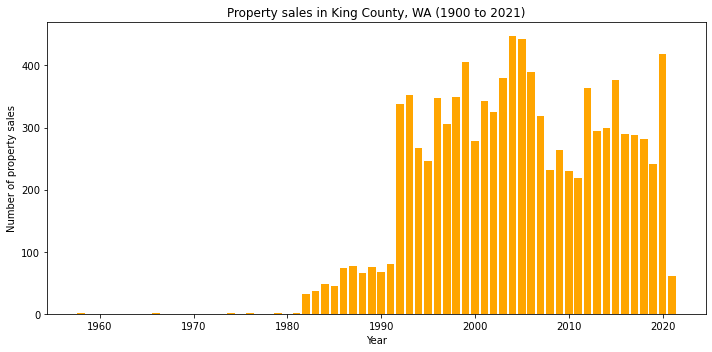

In [101]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# place data in a bar chart 
# where the x-axis is each year and 
# the y-axis is the number of sales per year
ax.bar(x=[sale[0] for sale in sale_year_count],
       height=[year[1] for year in sale_year_count], color = 'orange')



# set axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of property sales")

# give the bar chart a title
ax.set_title("Property sales in King County, WA (1900 to 2021)")

# display bar chart clearly
fig.tight_layout()

**Discussion:** What can we learn from this graph?

# Level Up: `Counter`

The `collections` package has a lot of useful tools for working with Python objects containing multiple elements. You can use the `Counter` class to easily count the number of values in a list.

For example, let's say that for all dictionaries in `sales`, we want to count how many property sales occured in each year. 

In [102]:
from collections import Counter

sale_year_count = Counter([sale['sale_year'] for sale in sales])

Let's sort these by year. Since the value in `sale_year` is an integer, we can use Python's built-in [`sorted`](https://docs.python.org/3/library/functions.html#sorted) function to transform the `Counter` object into a `list` of `tuples` - `(year, count)` which are sorted in ascending order by year.

In [103]:
sale_year_count = sorted(sale_year_count.items())
sale_year_count

[(1958, 1),
 (1966, 1),
 (1974, 1),
 (1976, 1),
 (1979, 1),
 (1981, 2),
 (1982, 32),
 (1983, 36),
 (1984, 48),
 (1985, 44),
 (1986, 74),
 (1987, 77),
 (1988, 66),
 (1989, 75),
 (1990, 68),
 (1991, 81),
 (1992, 338),
 (1993, 353),
 (1994, 267),
 (1995, 246),
 (1996, 347),
 (1997, 306),
 (1998, 349),
 (1999, 406),
 (2000, 279),
 (2001, 342),
 (2002, 325),
 (2003, 380),
 (2004, 447),
 (2005, 442),
 (2006, 389),
 (2007, 319),
 (2008, 231),
 (2009, 264),
 (2010, 230),
 (2011, 218),
 (2012, 364),
 (2013, 295),
 (2014, 299),
 (2015, 376),
 (2016, 290),
 (2017, 288),
 (2018, 281),
 (2019, 241),
 (2020, 419),
 (2021, 61)]

# Level Up: Using `datetime`

Python has a [`datetime`](https://docs.python.org/3.7/library/datetime.html) package that is the standard tool for handling dates and times. `datetime` objects make it easy to do fun things like subtract dates to calculate how far apart they are.

In [105]:
from datetime import datetime

In [106]:
for sale in sales:
    # Transform DocumentDate from string to datetime
    sale["clean_date"] = datetime.strptime(sale["DocumentDate"], 
                                           "%m/%d/%Y")
    
    # Add the sale year and month to each dictionary element of sales
    sale["sale_year"] = sale["clean_date"].year
    sale["sale_month"] = sale["clean_date"].month

Let's inspect our work

In [107]:
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' ',
 'sale_price': 245000,
 'sale_year': 2014,
 'sale_month': 8,
 'clean_date': datetime.datetime(2014, 8, 21, 0, 0)}